<a href="https://colab.research.google.com/github/shivamrai009/real-time-stock-price-prediction-/blob/main/stockprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import re

# All your IPO data pasted below
data = """
Radiant Cash Management Services Limited	₹94	₹104.9	11.6%	61.59	-34.48%
Sah Polymers Limited                    	₹65	₹89.25	37.31%	114.5	76.15%
Divgi TorqTransfer Systems Limited	₹590	₹605.2	2.58%	594.3	0.73%
Global Surfaces Limited           	₹140	₹171.05	22.18%	118.5	-15.36%
Udayshivakumar Infra Limited      	₹35	₹31.5	-10%	37.5	7.14%
Avalon Technologies Limited       	₹436	₹397.95	-8.73%	817.55	87.51%
Mankind Pharma Limited            	₹1080	₹1080	0%	2299.5	112.92%
Nexus Select Trus                 	₹100	₹104.29	4.29%	139.46	39.46%
IKIO Lighting Limited	            ₹285	₹403.85	41.7%	208.15	-26.96%
HMA Agro Industries Limited       	₹585	₹585.65	0.11%	32.45	-44.53%
ideaForge Technology Limited      	₹672	₹1294.95	92.7%	631.65	-6%
Cyient DLM Limited                	₹265	₹420.6	58.72%	461.15	74.02%
Senco Gold Limited                	₹317	₹405.3	27.85%	335	111.36%
Utkarsh Small Finance Bank Limited	₹25	₹48	92%	23.04	-7.84%
Netweb Technologies India Limited  ₹500	₹910.4	82.08%	1760.9	252.18%
Yatharth Hospital and Trauma Care Services Limited	₹300	₹300	0%	500.25	66.75%
SBFC Finance Limited              	₹57	₹92.2	61.75%	103.6	81.75%
Concord Biotech Limited            ₹741	₹942.8	27.23%	1822.5	145.95%
TVS Supply Chain Solutions Limited	₹197	₹201	2.03%	 131.4	-33.3%
Pyramid Technoplast Limited       	₹166	₹177.65	7.02%	178.05	7.26%
Aeroflex Industries Limite        	₹108	₹163.25	51.16%	204.6	89.44%
Vishnu Prakash R Punglia Limited  	₹99	₹145.7	47.17%	160.6	62.22%
Ratnaveer Precision Engineering Limited	₹98	₹129.35	31.99%	150.85	53.93%
Rishabh Instruments Limited       	₹441	₹443.15	0.49%	277.55	-37.06%
Jupiter Life Line Hospitals Limited	₹735	₹1075.75	46.36%	1477.95	101.08%
R R Kabel Limited                 	₹1035	₹1198.05	15.75%	1327.3	28.24%
EMS Limited                       	₹211	₹279.9	32.65%	585.6	177.54%
SAMHI Hotels Limited              	₹126	₹143.4	13.81%	214.35	70.12%
Zaggle Prepaid Ocean Services Limited	₹164	₹158.35	-3.45%	409.85	149.91%
Sai Silks (Kalamandir) Limited    	₹222	₹244.9	10.32%	134.55	-39.39%
Signatureglobal (India) Limited   	₹385	₹458.55	19.1%	1237.45	221.42%
Yatra Online Limited              	₹142	₹135.9	-4.3%	86.28	-39.24%
JSW Infrastructure Limited        	₹119	₹157.3	32.18%	302.45	154.16%
Manoj Vaibhav Gems 'N' Jewellers Limited	₹215	₹215.5	0.23%	253.3	17.81%
Updater Services Limited           ₹300	₹283.9	-5.37%	281.4	-6.2%
Valiant Laboratories Limited       ₹140	₹170.25	21.61%	111.75	-20.18%
Plaza Wires Limited                ₹54	₹80.2	48.52%	58.5	8.33%
IRM Energy Limited                 ₹505	₹473.15	-6.31%	303.7	-39.86%
Blue Jet Healthcare Limited        ₹346	₹413.4	19.48%	854.7	147.02%
Cello World Limited                ₹648	₹791.7	22.18%	576.6	-11.02%
Honasa Consumer Limited            ₹324	₹337.1	4.04%	303.65	-6.28%
ESAF Small Finance Bank Limited    ₹60	₹69.05	15.08%	32.31	-46.15%
Protean eGov Technologies Limited  ₹792	₹883	11.49%	871.9	10.09%
ASK Automotive Limited             ₹282	₹310.1	9.96%	476.1	68.83%
Indian Renewable Energy Development Agency Ltd	₹32	₹60	87.5%	165.5	417.19%
Tata Technologies Limited          ₹500	₹1313	162.6%	699.3	39.86%
Gandhar Oil Refinery (India) Limited	₹169	₹301.4	78.34%	166.75	-1.33%
Fedbank Financial Services Limited	₹140	₹140.25	0.18%	113.41	-18.99%
Flair Writing Industries Limited   ₹304	₹450.9	48.32%	247.05	-18.73%
India Shelter Finance Corporation Limited	₹493	₹544.7	10.49%	878.8	78.26%
DOMS Industries Limited            ₹790	₹1326.05	67.85%	2433.85	208.08%
Inox India Limited                 ₹660	₹939.95	42.42%	1174.45	77.95%
Muthoot Microfin Limited           ₹291	₹266.15	-8.54%	125.95	-56.72%
Motisons Jewellers Limited         ₹55	₹103.55	88.27%	19.8	260%
Suraj Estate Developers Limited    ₹360	₹334.5	-7.08%	356.7	-0.92%
RBZ Jewellers Limited              ₹100	₹105	5%	145.5	45.5%
Credo Brands Marketing Limited     ₹280	₹312.2	11.5%	160.5	-42.68%
Happy Forgings Limited             ₹850	₹1030.8	21.27%	957.7	12.67%
Azad Engineering Limited           ₹524	₹677.5	29.29%	1617.15	208.62%
Innova Captab Limited              ₹448	₹541.4	20.85%	845.5	88.73%
"""

# Regex to extract company name, issue price, listing day price, gain, current price, profit/loss
pattern = re.compile(r'^(.*?)\s+₹([\d.]+)\s+₹([\d.]+)\s+(-?[\d.]+)%\s+([\d.]+)\s+(-?[\d.]+)%$')

rows = []

for line in data.strip().split("\n"):
    match = pattern.match(line.strip())
    if match:
        company, issue_price, listing_day_price, gain, current_price, profit_loss = match.groups()
        rows.append({
            'Company Name': company.strip(),
            'Issue Price': float(issue_price),
            'Listing Day Price': float(listing_day_price),
            'Listing Day Gain %': float(gain),
            'Current Price': float(current_price),
            'Profit/Loss %': float(profit_loss)
        })
    else:
        print(f"Skipped line (format issue): {line}")

# Create DataFrame
df = pd.DataFrame(rows)

# Save to Excel
df.to_excel("ipos.xlsx", index=False)

print(f"✅ Excel file 'ipos.xlsx' created successfully with {len(df)} rows!")


✅ Excel file 'ipos.xlsx' created successfully with 60 rows!


In [4]:
from google.colab import files
files.download('ipos.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inside notebook
%matplotlib inline


In [6]:
# Step 2: Load the Excel data
df = pd.read_excel("ipos.xlsx")

# View first few rows
df.head()


,Company Name,Issue Price,Listing Day Price,Listing Day Gain %,Current Price,Profit/Loss %
0,Radiant Cash Management Services Limited,94,104.90,11.60,61.59,-34.48
1,Sah Polymers Limited,65,89.25,37.31,114.50,76.15
2,Divgi TorqTransfer Systems Limited,590,605.20,2.58,594.30,0.73
3,Global Surfaces Limited,140,171.05,22.18,118.50,-15.36
4,Udayshivakumar Infra Limited,35,31.50,-10.00,37.50,7.14


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company Name        60 non-null     object 
 1   Issue Price         60 non-null     int64  
 2   Listing Day Price   60 non-null     float64
 3   Listing Day Gain %  60 non-null     float64
 4   Current Price       60 non-null     float64
 5   Profit/Loss %       60 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ KB


       Issue Price  Listing Day Price  Listing Day Gain %  Current Price  \
count    60.000000          60.000000           60.000000      60.000000   
mean    336.616667         426.246500           27.413667     519.537333   
std     262.891876         364.307023           33.366174     575.063977   
min      25.000000          31.500000          -10.000000      19.800000   
25%     124.250000         145.125000            2.442500     133.762500   
50%     283.500000         305.750000           19.290000     279.475000   
75%     500.000000         554.937500           43.405000     728.862500   
max    1080.000000        1326.050000          162.600000    2433.850000   

       Profit/Loss %  
count       60.00000  
mean        55.11600  
std         93.52774  
min        -56.72000  
25%        -12.10500  
50%         33.85000  
75%         88.90750  
max        417.19000  


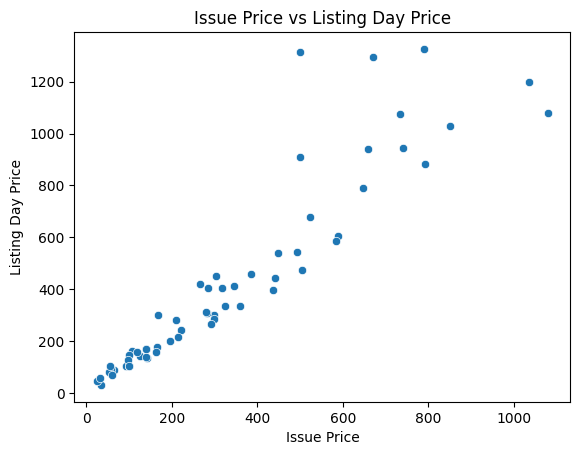

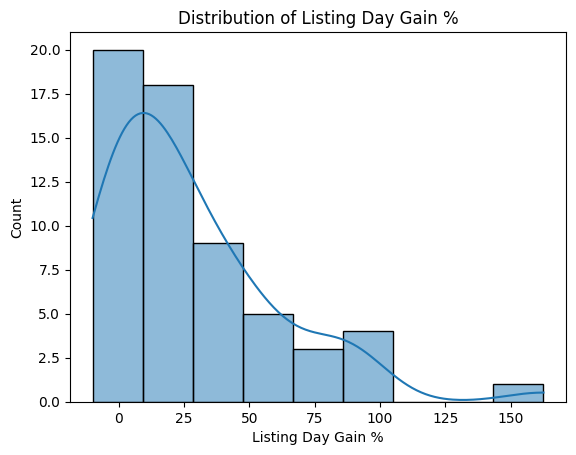

ValueError: could not convert string to float: 'Radiant Cash Management Services Limited'

In [8]:
# Step 3a: Basic stats
print(df.describe())

# Step 3b: Plot listing day price vs issue price
sns.scatterplot(data=df, x='Issue Price', y='Listing Day Price')
plt.title("Issue Price vs Listing Day Price")
plt.show()

# Step 3c: Plot distribution of listing day gain %
sns.histplot(df['Listing Day Gain %'], kde=True)
plt.title("Distribution of Listing Day Gain %")
plt.show()

# Step 3d: Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()


In [9]:
df.dtypes


,0
Company Name,object
Issue Price,int64
Listing Day Price,float64
Listing Day Gain %,float64
Current Price,float64
Profit/Loss %,float64


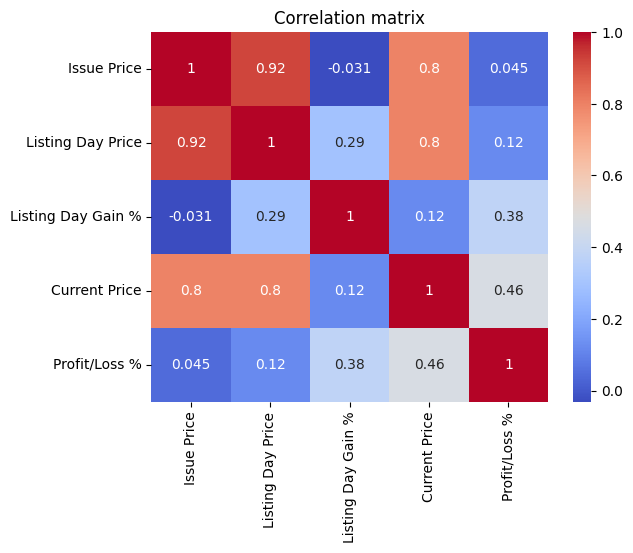

In [10]:
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()


In [12]:
pip install pandas scikit-learn numpy


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features and target
X = df[['Issue Price']]
y = df['Listing Day Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate predictions
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Optional: model coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


MAE: 132.7341229810598
RMSE: 237.54885511806103
R2 Score: 0.7095352283541032
Coefficient: 1.2161363563551655
Intercept: 0.1493537654140482


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Select multiple features - you can add or remove as you like
features = ['Issue Price', 'Listing Day Gain %', 'Current Price', 'Profit/Loss %']

X = df[features]
y = df['Listing Day Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")



MAE: 110.66149166666692
RMSE: 191.93554660445932
R2 Score: 0.8103737695362623


MAE: 132.7341229810598
RMSE: 237.54885511806103
R2 Score: 0.7095352283541032


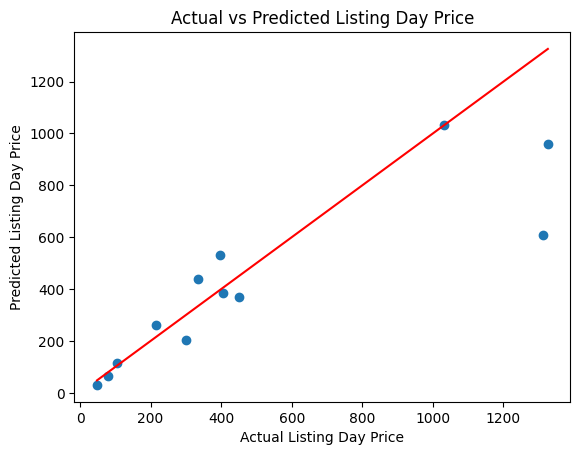

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming your DataFrame is df and target is 'Listing Day Price'
X = df[['Issue Price']]  # or any features you want to use
y = df['Listing Day Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Visualize predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Listing Day Price')
plt.ylabel('Predicted Listing Day Price')
plt.title('Actual vs Predicted Listing Day Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()


In [18]:
import pandas as pd

new_data = pd.DataFrame({
    'Issue Price': [222,614,140]  # Replace with actual values
})


In [19]:
predictions = model.predict(new_data)
print(predictions)


[270.13162488 746.85707657 170.40844366]
